<a href="https://colab.research.google.com/github/ImShrekNotTanya/LB4_03_Prob_Theory/blob/master/LB4_03_Vakulenko_Adabeli_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 2:** Реализовать все методы из статьи для получения бросков кубика (100, 1000, 10000, 1000000) и построить гистограмму для каждого из бросков

Введите число бросков для кубика (100, 1000, 10000, 1000000): 
100
Ваши броски:    Количество выпаданий  Частота  Вероятность
1                     1       11         0.11
2                     2       15         0.15
3                     3       16         0.16
4                     4       13         0.13
5                     5       24         0.24
6                     6       21         0.21


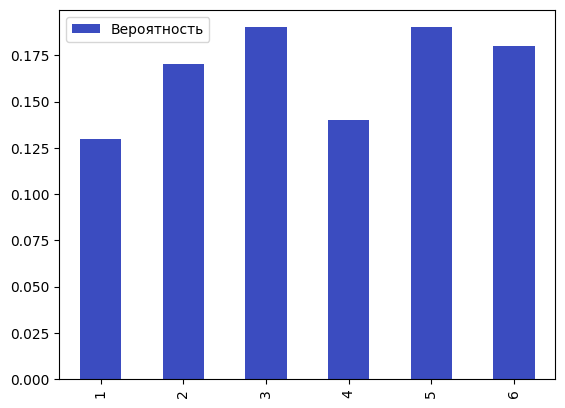

In [69]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Первый метод
def kubik(n: int) -> list:
    """
    :param n: Количество подбрасываний
    :return:  Список случайных подбрасываний кубика
    """

    data = []

    for i in range(n):
      data.append(random.randint(1,6))
    return data

# Второй метод
def kubik_2(n: int) -> list:
    """
    :param n: Количество подбрасываний
    :return:  Список случайных подбрасываний кубика
    """

    data = random.choices(range(1, 7), k=n)  # Получаем n случайных чисел от 1 до 6 с возможностью повторений
    return data

# Третий метод
def kubik_3(n: int) -> list:
    """
    :param n: Количество подбрасываний
    :return:  Список случайных подбрасываний кубика
    """

    data = [random.randrange(1, 7) for _ in range(n)]  # Генерируем n случайных чисел от 1 до 6
    return data

# Четвертый метод
def kubik_4(n: int) -> list:
    """
    :param n: Количество подбрасываний
    :return:  Список случайных подбрасываний кубика
    """

    data = []
    for _ in range(n):  # Используем цикл для n подбрасываний
        data.append(random.randint(1, 6))  # Генерируем случайное число от 1 до 6 и добавляем в список
    return data

def count_rate(kub_data: list):
    """
    Возвращает частоту выпадания значений кубика,
    согласно полученным данным
    :param kub_data: данные эксперимента
    :return:
    """
    kub_rate = {}
    for i in kub_data:
        if i in kub_rate:
            continue
        else:
            kub_rate[i] = kub_data.count(i)
    for i in range(1, 7):
        if i not in kub_rate:
            kub_rate[i] = 0
    return kub_rate

def sort_rate(counted_rate: dict):
    """
    Возвращает отсортированную частоту по ключу
    :param counted_rate: Наша неотсортированная частота
    :return:
    """
    sorted_rate = {}
    for key in sorted(counted_rate.keys()):
        sorted_rate[key] = counted_rate[key]
    return sorted_rate

def crate_dataframe(sorted_date: dict):
    """
    Создание и преобразование данных в Pandas dataframe
    :param sorted_date: dict
    :return: pd.Dataframe
    """
    df = pd.DataFrame(sorted_date, index=[0])
    df = df.T
    df = df.rename(columns={0: 'Частота'})
    df.insert(0, 'Количество выпаданий', range(1, 1 + len(df)))
    return df


def probability_solving(dataframe: pd.DataFrame):
    """
    Вычисление вероятности полученных результатов
    :param dataframe:
    :return:
    """
    sum_rate = dataframe['Частота'].sum()
    probability = []
    for i in dataframe['Частота']:
        probability.append(i / sum_rate)
    dataframe['Вероятность'] = probability
    return dataframe

print("Введите число бросков для кубика (100, 1000, 10000, 1000000): ")
# print(f'Ваши броски: {probability_solving(crate_dataframe(sort_rate(count_rate(kubik(n = int(input()))))))}')
# print(f'Ваши броски: {probability_solving(crate_dataframe(sort_rate(count_rate(kubik_2(n = int(input()))))))}')
# print(f'Ваши броски: {probability_solving(crate_dataframe(sort_rate(count_rate(kubik_3(n = int(input()))))))}')
print(f'Ваши броски: {probability_solving(crate_dataframe(sort_rate(count_rate(kubik_4(n = int(input()))))))}')
# Построение гистограммы
# proba1 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik(n)))))
# a = proba1['Вероятность'].plot(kind='bar', legend=True, cmap='coolwarm')
# plt.show()

# proba2 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_2(n)))))
# a = proba2['Вероятность'].plot(kind='bar', legend=True, cmap='coolwarm')
# plt.show()

# proba3 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_3(n)))))
# a = proba3['Вероятность'].plot(kind='bar', legend=True, cmap='coolwarm')
# plt.show()

proba4 = probability_solving(crate_dataframe(sort_rate(count_rate(kubik_4(n)))))
a = proba4['Вероятность'].plot(kind='bar', legend=True, cmap='coolwarm')
plt.show()